# Исследование рынка компьютерных игр

# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План проекта

**Шаг 1. Открыть файл с данными и изучить общую информацию**
Путь к файлу: /datasets/games.csv. 

**Шаг 2. Подготовить данные**
- Заменить названия столбцов (приведите к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберать это значение и опишите, как его обработать;
- Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона** 
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задать самостоятельно пороговое значение alpha.

Пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

##  Изучаю общую информацию

In [1]:
#импортирую необходимые бибилиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games_data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод по шагу 1

Ипортировал библиотеки и открыл датасет. 
Имеем 11 столбцов и 16715 столбцов данных. В некотрых (Name, Year_of_Realease, Critic_Score, User_Score и Raiting) заметны пропуски. 

## Предобработка данных

In [5]:
df = games_data

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
#привожу названия столбцов к нижнему регистру, чтобы минимизироавть шанс ошибиться
df.columns = df.columns.str.lower() 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас есть 2 игры без названия и 2 без жанра. Заполним поля на none, чтобы не терять другие данные этих строк.

In [9]:
df['name'] = df['name'].fillna('none')
df['genre'] = df['genre'].fillna('none')

Пропущенные год релиза и оценки заменим нулями, куда деваться:

In [10]:
df['year_of_release'] = df['year_of_release'].fillna(0.0)
df['critic_score'] = df['critic_score'].fillna(0.0)

In [11]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.3       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [12]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Можно было бы предположить, что если нет рейтинга -- игра для всех возрастов, но одна только "Haitaka no Psychedelica" без рейтинга вызывает вопромы к этой гипотезе, так что оставлю этот столбец без изменений. 

In [13]:
#заменяю типы данных, где нужно: 

df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')

In [14]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.3       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце user_score встречается "tbd", что означает, что рейтинг ещё не определен. Заменим их на 0.0, благо этих оценок тоже достаточно много.

In [15]:
df.loc[(df['user_score'] == 'tbd')] = 0.0

In [16]:
df['user_score'] = df['user_score'].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         10014 non-null float64
rating             9999 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Сделаю новый столбец с суммарными продажами по всем регионам

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод по шагу 2

Привёл названия столбцов к нижнему регистру, заменил пропуски в столбцах 'name' и 'genre' на 'none', чтобы сохранить, пусть и обезличенные данные по этим играм.  
Значения 'tbd' в столбце 'user_score' заменил нулями, так как эти оценки, по-видимому, еще не посчитаны. Также есть множетсво игр с пользовательской оценкой 0, что явно является ошибкой в выгрузке. При анализе эти значения учитывать не буду. 
Где возможно (столбцы 'year_of_release' и 'critic_score') заменил значения на целочисленные. 

## Исследовательский анализ данных

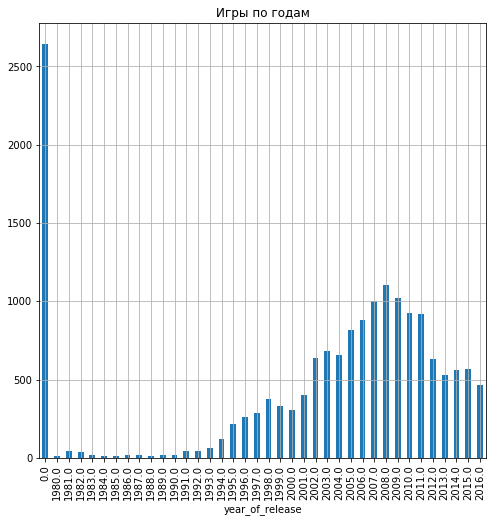

In [19]:
#Построю график выпуска игр по годам
(df.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(8,8), title='Игры по годам', grid=True))
plt.show() 

Заметен всплеск у 1994 года. Это и WarCraft II, и Mortal Kombat 3. При этом есть огромный всплеск игр без года выпуска. По условию нам важны только данные за актуальный период, а вычлинить из этих нулей их не получится. Придётся отказаться от такого объма данных. 

Посмотрим, какие платформы являются самыми популярными: 

In [20]:
df['platform'].value_counts()

0.0     2424
PS2     1921
DS      1395
PS3     1244
X360    1178
PS      1152
PSP     1086
PC       925
Wii      880
XB       674
GBA      560
3DS      464
GC       453
PSV      423
PS4      386
N64      319
SNES     239
XOne     236
SAT      173
WiiU     142
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [21]:
top_platforms = df.query('platform == "PS2" or platform == "DS" or platform == "PS3" or platform == "X360" or platform == "PS" or platform == "PSP" or platform == "PC"')

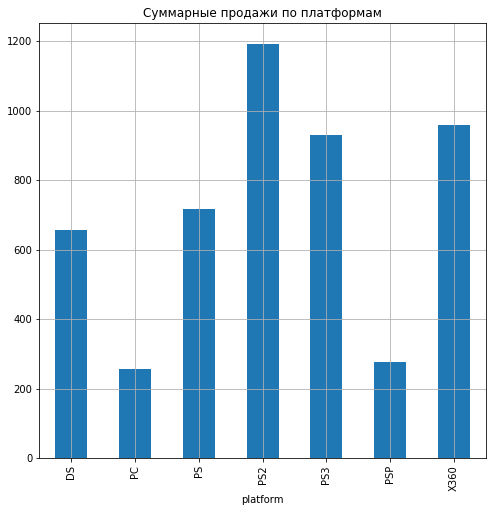

In [22]:
#Построю график продаж по платформам
(top_platforms.groupby('platform')['all_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по платформам', grid=True))
plt.show() 

In [23]:
df_top8_platforms = pd.DataFrame(df['platform'].value_counts().head(8))
for i in df_top8_platforms.index:
    platform_name = i
    print(platform_name)

0.0
PS2
DS
PS3
X360
PS
PSP
PC


In [24]:
df_top8_platforms.drop([0], inplace=True)

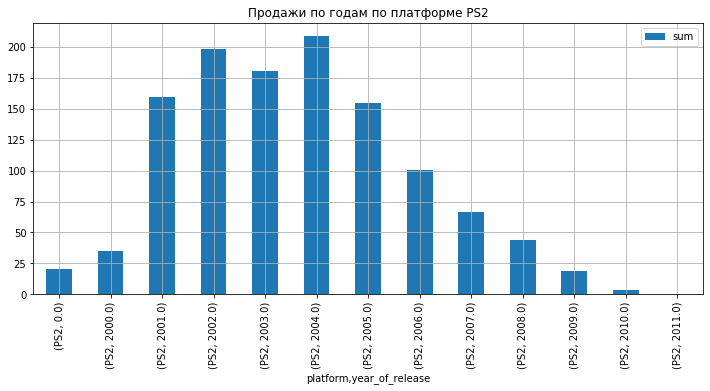

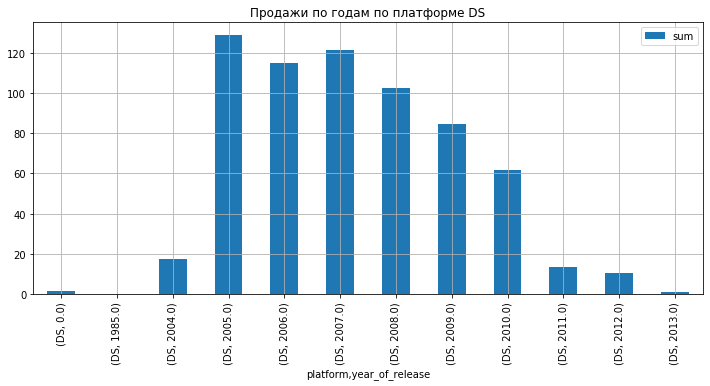

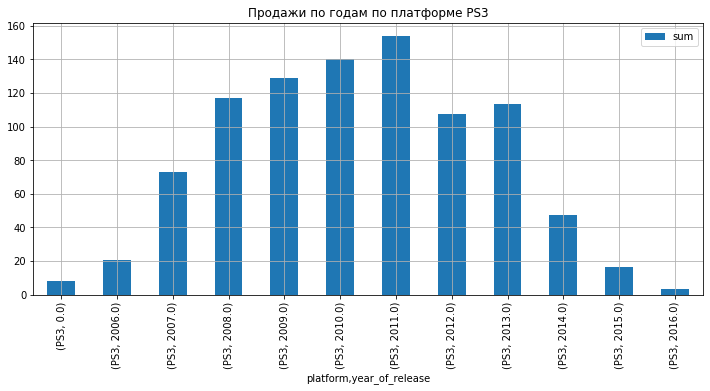

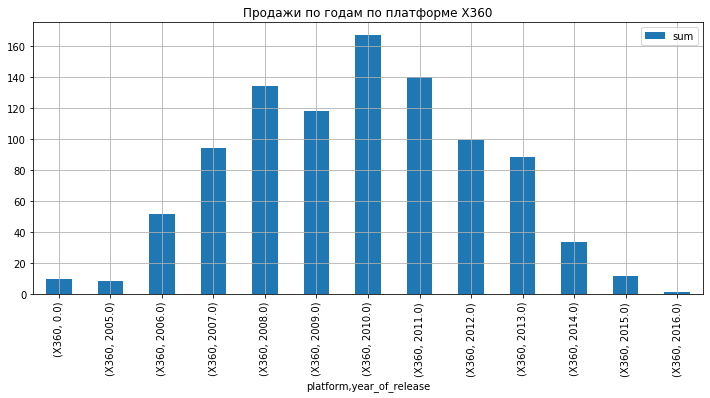

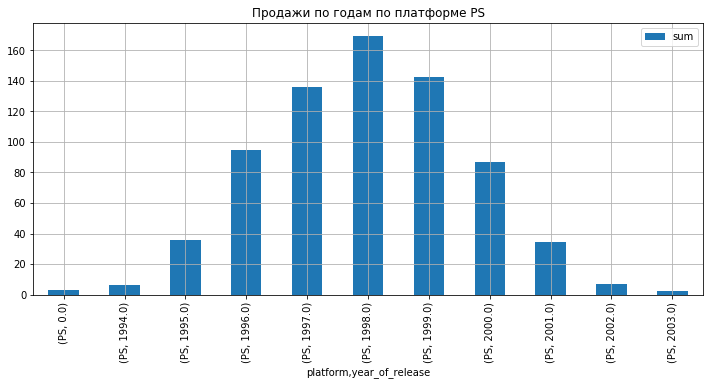

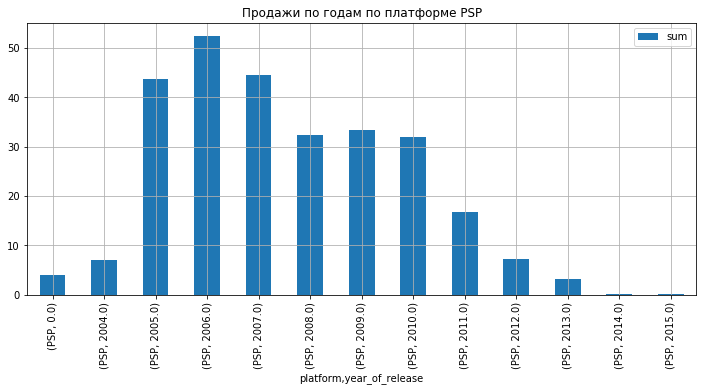

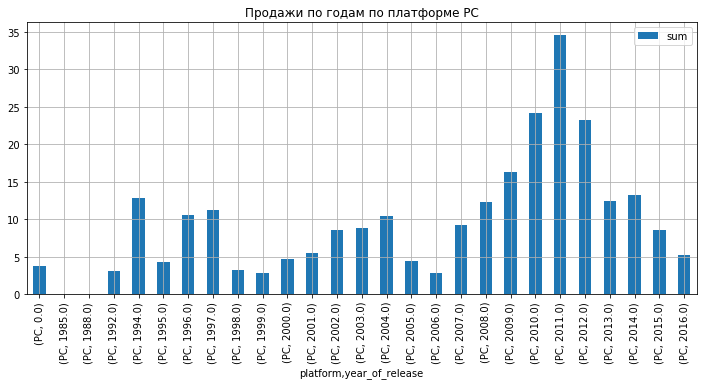

In [25]:
for i in df_top8_platforms.index:
    platform_name = i
    df.groupby(['platform', 'year_of_release'])['all_sales'].agg(['sum']).query('platform == @platform_name').plot(kind='bar', grid=True, figsize=(12, 5), title=f'Продажи по годам по платформе {platform_name}')

Видим, что промежуток жизни платформ в основном коллеблется в районе 7-8 лет. По результату, актуальным периодом приму промежуток с 2011 года по 2016. Нижняя граница выбрана таковой, потому что в 2011 году уже выходило достаточное количество игр в целом, появилась платформа XBOX360, вы многом определившая образ современных игр, прекратился выпуск игр для PS и всего через год вышла революционная PS3. 

In [26]:
good_data = df.query('year_of_release > 2010')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 16 to 16714
Data columns (total 12 columns):
name               3673 non-null object
platform           3673 non-null object
year_of_release    3673 non-null float64
genre              3673 non-null object
na_sales           3673 non-null float64
eu_sales           3673 non-null float64
jp_sales           3673 non-null float64
other_sales        3673 non-null float64
critic_score       3673 non-null float64
user_score         2032 non-null float64
rating             1990 non-null object
all_sales          3673 non-null float64
dtypes: float64(8), object(4)
memory usage: 373.0+ KB


Посмотрю, какие платформы в актуальном периоде лидируют по продажам, растут или падают.

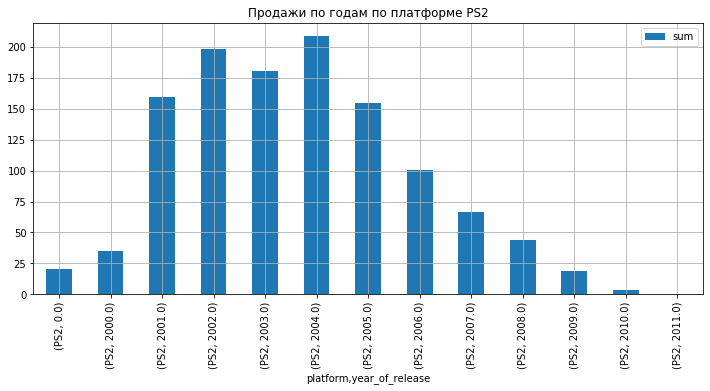

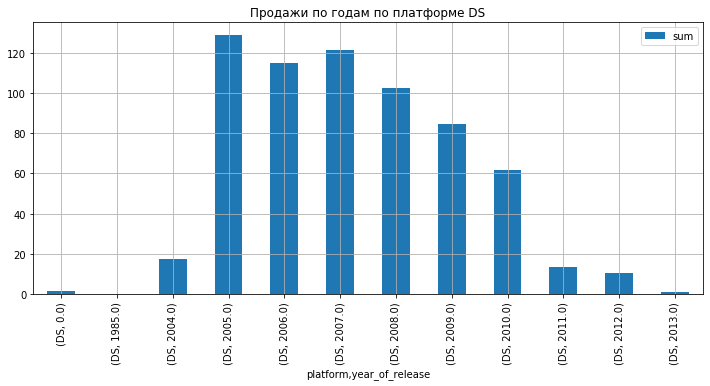

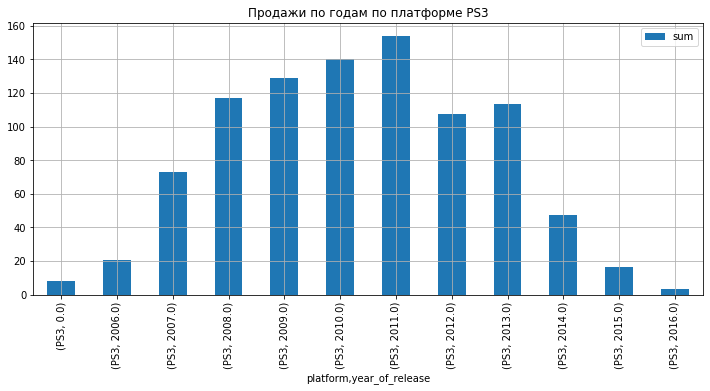

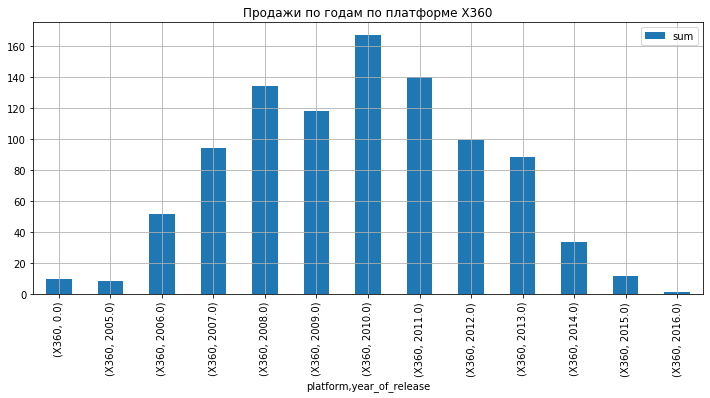

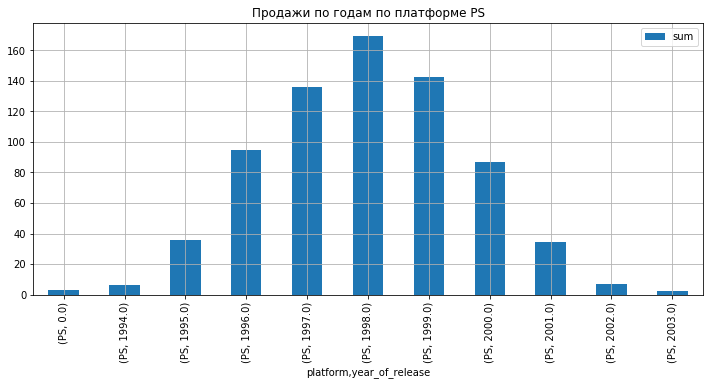

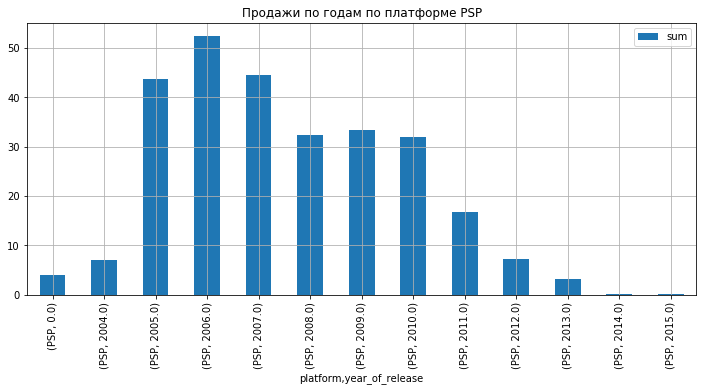

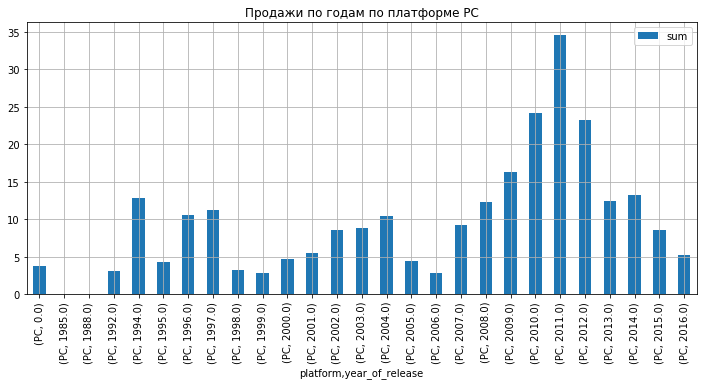

In [27]:
for i in df_top8_platforms.index:
    platform_name = i
    df.groupby(['platform', 'year_of_release'])['all_sales'].agg(['sum']).query('platform == @platform_name').plot(kind='bar', grid=True, figsize=(12, 5), title=f'Продажи по годам по платформе {platform_name}')

Учитывая, что данные за 2016 год могут быть неполными, видим логичный вывод: набирают обороты только **PS4, XBOX One и PC**. Остальные платформы либо доживают последние деньки, либо начинают терять популярность. 

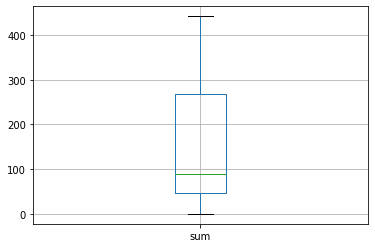

In [28]:
good_data.groupby(['platform'])['all_sales'].agg(['sum']).boxplot()

Большая часть платформ имеет продажи в диапазоне от 50 до 250 миллионов миллионов копий. При этом первый квартиль лежит в районе нуля, что говорит о наличии выбосов в виде нулевых продаж. 

Посмотрю, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Посторою диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.

In [29]:
ps4_data = good_data.query('platform == "PS4"')

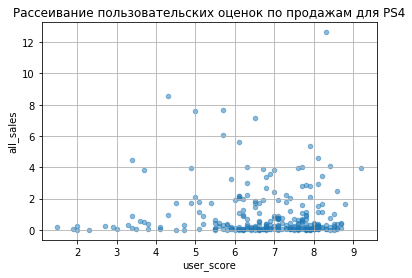

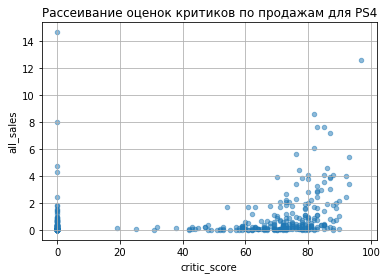

In [30]:
ps4_data.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание пользовательских оценок по продажам для PS4')
ps4_data.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание оценок критиков по продажам для PS4')

In [31]:
#считаю корреляцию 
print('Корреляция продаж и пользовательских оценок для PS4', ps4_data['all_sales'].corr(ps4_data['user_score']))
print('Корреляция продаж и оценок критиков для PS4', ps4_data['all_sales'].corr(ps4_data['critic_score']))

Корреляция продаж и пользовательских оценок для PS4 -0.031957110204556424
Корреляция продаж и оценок критиков для PS4 0.22531374506928592


В целом, диаграммы рассеивания продаж по оценкам пользователей и критиков для PS4 похожи. Заметно наличие выбросов в диаграме с оценкой пользователей. Можно заключить, что мнение критиков лучше описывает игры, чем мнение игроков. 

Однако о зависимости между оценками и продажами говорить не приходится. Значение коэффициентов корреляции это подтверждает.

In [32]:
XOne_data = good_data.query('platform == "XOne"')
pc_data = good_data.query('platform == "PC"')

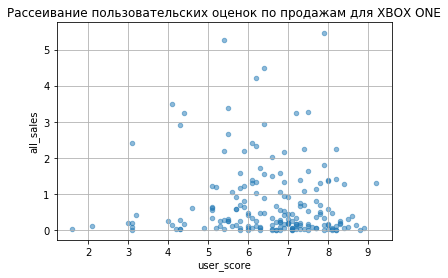

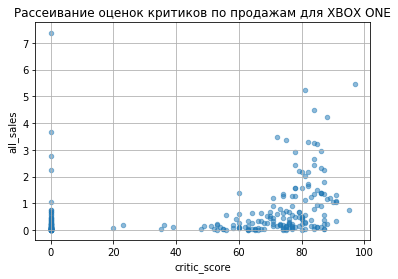

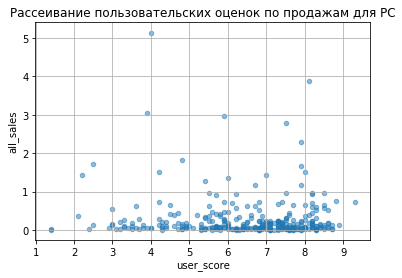

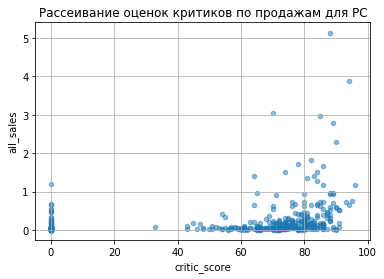

In [33]:
XOne_data.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание пользовательских оценок по продажам для XBOX ONE')
XOne_data.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание оценок критиков по продажам для XBOX ONE')

pc_data.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание пользовательских оценок по продажам для PC')
pc_data.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.5, title = 'Рассеивание оценок критиков по продажам для PC')

In [34]:
#считаю корреляцию 
print('Корреляция продаж и пользовательских оценок для XBOX ONE', XOne_data['all_sales'].corr(XOne_data['user_score']))
print('Корреляция продаж и оценок критиков для XBOX ONE', XOne_data['all_sales'].corr(XOne_data['critic_score']))
print()
print('Корреляция продаж и пользовательских оценок для PC', pc_data['all_sales'].corr(pc_data['user_score']))
print('Корреляция продаж и оценок критиков для PC', pc_data['all_sales'].corr(pc_data['critic_score']))

Корреляция продаж и пользовательских оценок для XBOX ONE -0.06892505328279412
Корреляция продаж и оценок критиков для XBOX ONE 0.26026865735100657

Корреляция продаж и пользовательских оценок для PC -0.04896683233511954
Корреляция продаж и оценок критиков для PC 0.23937442220386784


Получается, что зависимости между оценками и продажами нет ни на одной платформе. При этом пользовательские оценки на PC и XBOX One ещё хуже отражают ситуацию, чем оценки критиков. 

Проверим распределение по жанрам и выявим самые прибыльные: 

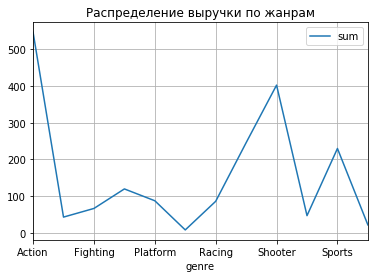

In [35]:
good_data.groupby(['genre'])['all_sales'].agg(['sum']).plot(grid=True, style='', title = 'Распределение выручки по жанрам')

Самые прибыльные жанры -- экнш и шутеры. Часто в играх эти жанры пересекаются, что лишний раз подтверждает полученные значения. 
Выделить самые "бедные" жанры не получается, но наименьшие значения имеют файтинги, платформеры и гонки. 

### Вывод по шагу 3

Посмотрел данные по продажам игр по годам: с 1992 по 2008 годы наблюдался постепенный рост продаж, позже, видимо, случился кризис, и продажи игр упали. Определил актуальный период с 2011 по 2016 годы, потому что в эти годы уже выходило достаточное количество игр в целом, появилась платформа XBOX360, вы многом определившая образ современных игр, прекратился выпуск игр для PS и всего через год вышла революционная PS3.

Проанализировал продажи по платформам, самой популярной за все время стала PS2, самой слабой -- PSP. 

В анализируемый период растут продажи на XBOX ONE, PS4 и PC. Их же определил потенциально прибыльными.

«Ящик с усами» показал наличие выбросов в районе нулевых продаж, а также, что большинство игр продавались в районе от 48 до 250 миллионов миллионов копий. 

Судя по коэффициентам корреляции, отзывы критиков и игроков не влияют на продажи игр, но диаграммы рассеивания продаж по оценкам экспертов показывают, что игры с низким рейтингом не собирают много в продаже. 

##  Составить портреты пользователей

In [36]:
#собираю данные для пользователей из Северной Америки: 
na_data = good_data.query('na_sales != 0.00')
na_data = na_data.drop(na_data.columns[[5, 6, 7, 11]], axis='columns')

#собираю данные для пользователей из Европы: 
eu_data = good_data.query('eu_sales != 0.00')
eu_data = eu_data.drop(eu_data.columns[[4, 6, 7, 11]], axis='columns')

#собираю данные для пользователей из Японии: 
jp_data = good_data.query('jp_sales != 0.00')
jp_data = jp_data.drop(jp_data.columns[[4, 5, 7, 11]], axis='columns')

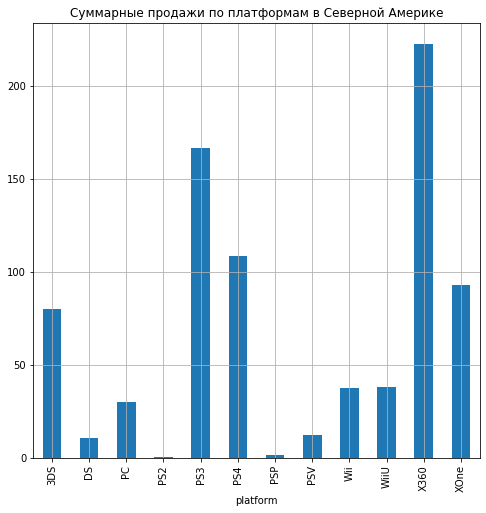

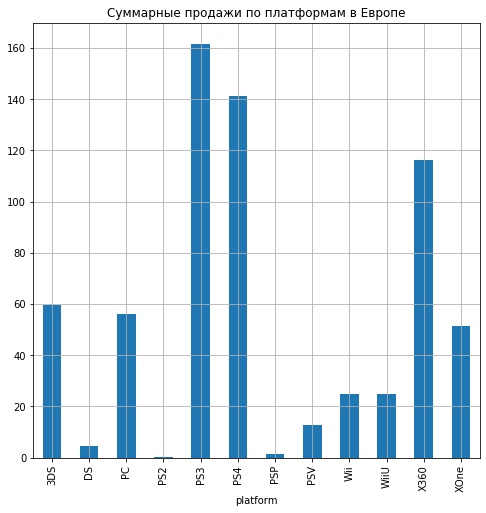

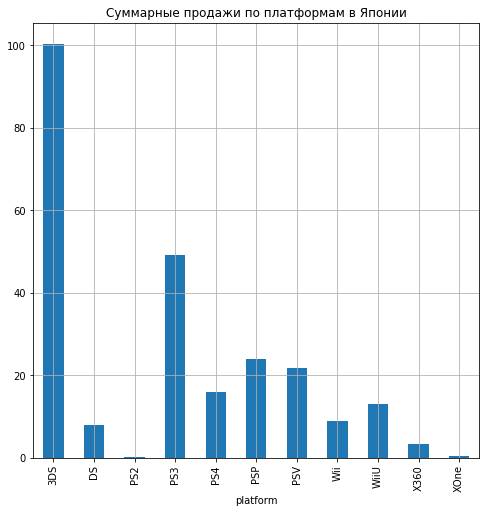

In [37]:
#Строю графики популярности отдельных платформ в зависимости от региона:
(na_data.groupby('platform')['na_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по платформам в Северной Америке', grid=True))
plt.show() 
(eu_data.groupby('platform')['eu_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по платформам в Европе', grid=True))
plt.show() 
(jp_data.groupby('platform')['jp_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по платформам в Японии', grid=True))
plt.show() 

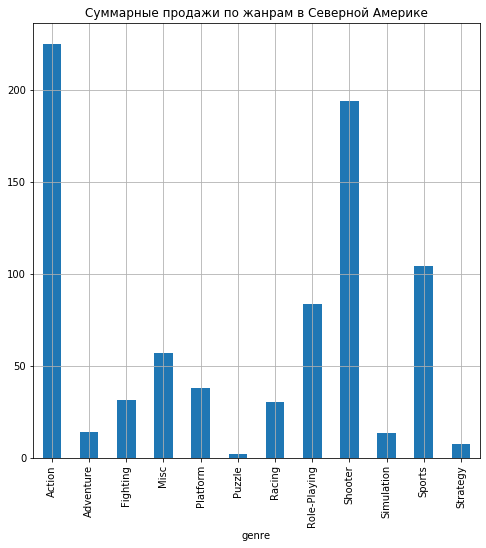

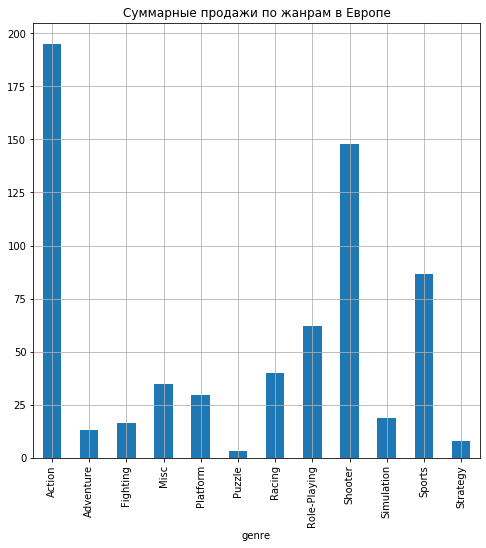

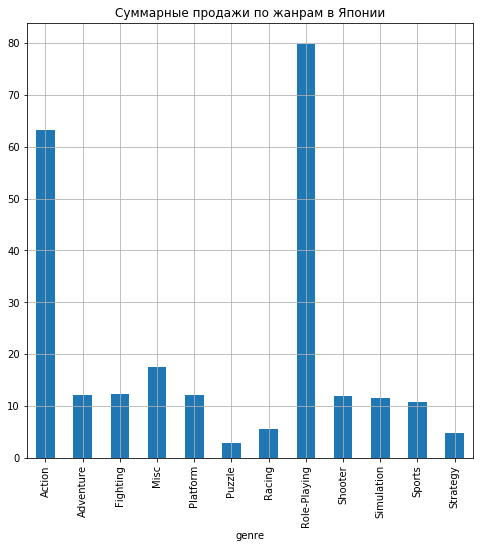

In [38]:
#Строю графики популярности отдельных жанров в зависимости от региона:
(na_data.groupby('genre')['na_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Северной Америке', grid=True))
plt.show() 
(eu_data.groupby('genre')['eu_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Европе', grid=True))
plt.show() 
(jp_data.groupby('genre')['jp_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Японии', grid=True))
plt.show() 

Проверю, влияет ли рейтинг ESRB на продажи в отдельном регионе:

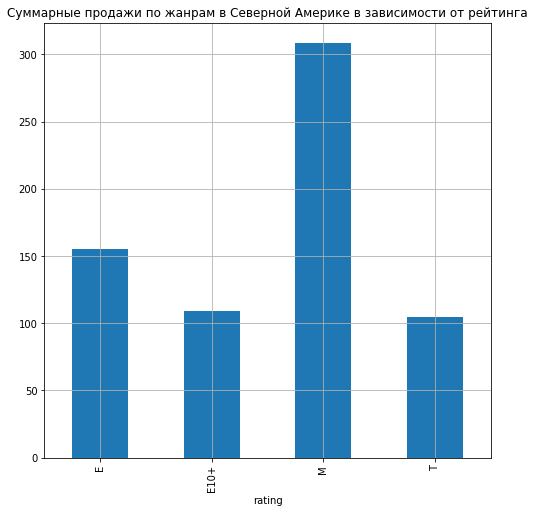

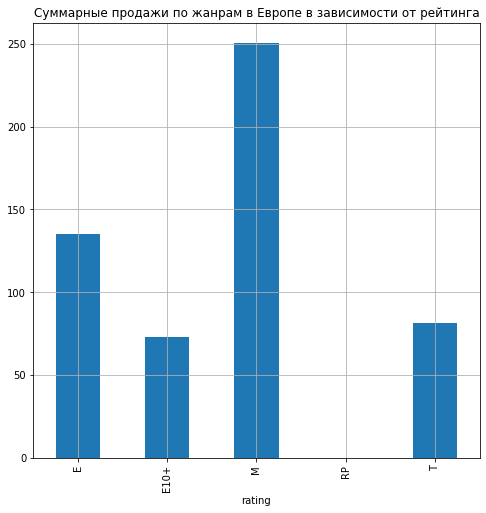

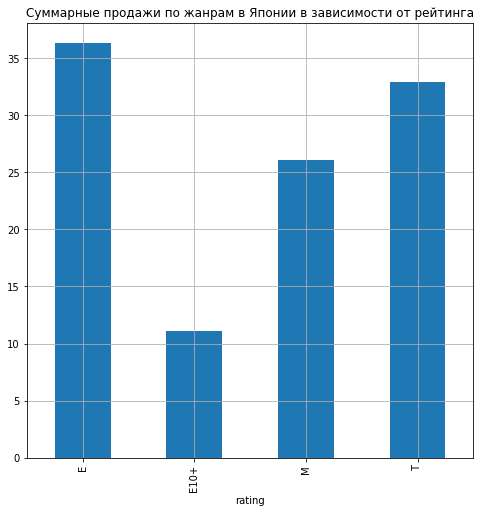

In [39]:
(na_data.groupby('rating')['na_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Северной Америке в зависимости от рейтинга', grid=True))
plt.show() 
(eu_data.groupby('rating')['eu_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Европе в зависимости от рейтинга', grid=True))
plt.show() 
(jp_data.groupby('rating')['jp_sales'].agg('sum').plot(kind='bar', figsize=(8,8), title='Суммарные продажи по жанрам в Японии в зависимости от рейтинга', grid=True))
plt.show() 

### Вывод по шагу 4

#### Портрет игрока из Северной Америки

По большей части играет на консолях PS3 и Xbox360, со временем переходит на более актуальные PS4 и XBOX ONE. Совесем не играет на PSP и PS2. 

В основном играет в игры жанров action и schooter. Также часто играет в спортивные симуляторы. Совсем не играет puzzle и недолюбливает strategy. 

Чаще покупает игры для взрослых - рейтинг "M" - Mature. 

#### Портрет игрока из Европы

Европейский игрок больше любит PlayStation, нежели Xbox. Набирающая во всем мире популярность PS4 в Европе уже обогнала укоренившийся Xbox360. В остальном, распределение платформ схоже с американским игроком. 

По паттерну жанров и влиянию рейтинга европейский игрок полностью совпадает с американским товарищем. 

#### Портрет игрока из Японии

Настоящий самурай играет на 3DS, совсем не играет на устаревшей PS2 и новейшем XBOX ONE. 

Он следует своему бусидо и не ценит шутеры, как западные игроки. Ему больше по душе ролевые игры с элементами экшена.

Также он не врёт о своём возрасте дистрибьютеру и покупает в основном игры с рейтингом "E" - для всех и "T" - для детей. 

##  Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [40]:
#Подготовлю выборки для проверки первой гипотезы:
xone_users = good_data.query('platform == "XOne"')
pc_users = good_data.query('platform == "PC"')

In [41]:
xone_scores = xone_users['user_score']
pc_scores = pc_users['user_score']

xone_scores = xone_scores.dropna()
pc_scores = pc_scores.dropna()

**Гипотеза H₀**: Средний пользовательский рейтинг игр на Xbox One отличается от рейтинга игр на PC;

**Альтернативная гипотеза**: Средние пользовательские рейтинги игр на Xbox One и PC равны.

In [42]:
#Сравним сисло записей в выборках:
print(len(xone_scores))
print()
print(len(pc_scores))

182

307


In [43]:
#Проверю дисперсии выборок:
xone_var = np.var(xone_scores)
pc_var= np.var(pc_scores)

In [44]:
platform_equal = xone_var / pc_var
platform_equal

0.7328581791897794

Дисперсии различаются более чем на 5%, делаем вывод: не равны. Значение equal_var будет False

In [45]:
#Проверяем первую гипотезу:
alpha = .05
    
results = st.ttest_ind(
    xone_scores, 
    pc_scores, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Переходим ко второй гипотезе:

**Гипотеза H₀**: Средний пользовательский рейтинг игр жанра Action равен среднему рейтигу игр жанра Sports;

**Альтернативная гипотеза**: Средние пользовательские рейтинги игр жанра Action и Sports отличаются.

In [46]:
#Подготавливаю выборки:
action_data = good_data.query('genre == "Action"')
sports_data = good_data.query('genre == "Sports"')

In [47]:
action_scores = action_data['user_score']
sports_scores = sports_data['user_score']

action_scores = action_scores.dropna()
sports_scores = sports_scores.dropna()

In [48]:
#Сравним сисло записей в выборках:
print(len(action_scores))
print()
print(len(sports_scores))

664

246


In [49]:
#Проверю дисперсии выборок:
action_var = np.var(action_scores)
sports_var= np.var(sports_scores)

genre_equal = action_var / sports_var
genre_equal

0.6301913430290841

Дисперсии различаются более чем на 5%, делаем вывод: не равны. Значение equal_var будет False

In [50]:
#Проверяем вторую гипотезу:
alpha = .05
    
results = st.ttest_ind(
    action_scores, 
    sports_scores, equal_var = False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу


### Вывод по шагу 5

Подготовил выборки для проверки гипотез. Применил метод st.ttest_ind, так как совокупности не являются парными и число записей в них различается. Проверил для обоих случаев разность дисперсий, из-за чего установил значение equal_var как False.

Отвергнуть первую нулевую гипотезу не получилось. Получается, нельзя утверждать, что пользовательские рейтинги платформ Xbox One и PC равны. 

Полученное значение t-критерия для второй нулевой гипотезы позволяет отвергнуть её. Выходит, средний пользовательский рейтинг игр жанра Action отличается от рейтинга игр жанра Sports.

## Общий вывод

На входе имели датасет с данными по продажам игр 16715 записей. Импортировал нужные для анализа библиотеки, свёл к нижнему регистру название столбцов, заменил пропущенные значения на none, чтобы не искажать результаты анализа. 
Посчитал суммарные продажи по всем регионам. 
Построил граффик суммарных продаж по платформам. Самыми популярными за все время оказались PS2 и Xbox 360. Самой непопулярной - PS Vita. Низние значения по PC можно объяснить недостаточностью данных и большим распространением пиратства на этой платформе. 

Построил **график продаж за всё время по всем платформам**. До 2008 года наблюдался стабильный рост индустрии, после чего продажи снижаются из года в год. 

Построил **график продаж по платформам**. Сравних их установил, что период актуальности платформ в основном коллеблется в районе 7-8 лет. По результату, актуальным периодом приму промежуток с 2011 года по 2016. Нижняя граница выбрана таковой, потому что в 2011 году уже выходило достаточное количество игр в целом, появилась платформа XBOX360, вы многом определившая образ современных игр, прекратился выпуск игр для PS и всего через год вышла революционная PS3.

По результату **анализа продаж актуального периода** вижу, что набирают обороты только PS4, XBOX One и PC. Остальные платформы либо доживают последние деньки, либо начинают терять популярность.

Проанализировал **продажи по платформам**, самой популярной за все время стала PS2, самой слабой -- PSP.

В анализируемый период растут продажи на XBOX ONE, PS4 и PC. Их же определил потенциально прибыльными.

**«Ящик с усами»** показал наличие выбросов в районе нулевых продаж, а также, что большинство игр продавались в районе от 48 до 250 миллионов миллионов копий.

Судя по **коэффициентам корреляции**, отзывы критиков и игроков не влияют на продажи игр, но диаграммы рассеивания продаж по оценкам экспертов показывают, что игры с низким рейтингом не собирают много в продаже.

Составил обощенные портреты игроков из разных регионов: 

**Портрет игрока из Северной Америки**
По большей части играет на консолях PS3 и Xbox360, со временем переходит на более актуальные PS4 и XBOX ONE. Совесем не играет на PSP и PS2.

В основном играет в игры жанров action и schooter. Также часто играет в спортивные симуляторы. Совсем не играет puzzle и недолюбливает strategy.

Чаще покупает игры для взрослых - рейтинг "M" - Mature.

**Портрет игрока из Европы**
Европейский игрок больше любит PlayStation, нежели Xbox. Набирающая во всем мире популярность PS4 в Европе уже обогнала укоренившийся Xbox360. В остальном, распределение платформ схоже с американским игроком.

По паттерну жанров и влиянию рейтинга европейский игрок полностью совпадает с американским товарищем.

**Портрет игрока из Японии**
Настоящий самурай играет на 3DS, совсем не играет на устаревшей PS2 и новейшем XBOX ONE.

Он следует своему бусидо и не ценит шутеры, как западные игроки. Ему больше по душе ролевые игры с элементами экшена.

Также он не врёт о своём возрасте дистрибьютеру и покупает в основном игры с рейтингом "E" - для всех и "T" - для детей.

**Проверка гипотез дала следующие результаты**:

- Нельзя утверждать, что пользовательские рейтинги платформ Xbox One и PC равны.
- Средний пользовательский рейтинг игр жанра Action отличается от рейтинга игр жанра Sports.